In [264]:
import pickle
import pandas as pd
import re
import demoji
import spacy
import en_core_web_sm
import matplotlib.pyplot as plt
from datetime import datetime

In [265]:
# loading the dataset we 
df = pd.DataFrame()
df = pickle.load(open("30thJunedata","rb"))
display(df, df.shape)

,Tweet,Username,Date,Likes,Retweet count
0,"""Black Lives Matter presents an inaccurate and...",Telegraph,2020-06-30 21:43:14,48,21
1,"""Our protest was on June 4 and we started to g...",Telegraph,2020-06-30 21:15:21,38,29
2,"""Glorifying difference is exactly what BLM and...",Telegraph,2020-06-30 07:36:53,39,11
3,The Black Lives Matter movement has drawn atte...,Telegraph,2020-06-29 19:08:05,13,7
4,"""Glorifying difference is exactly what BLM and...",Telegraph,2020-06-29 16:40:34,29,12
...,...,...,...,...,...
1023,New York City officials on Tuesday agreed to a...,nytimes,2020-06-30 23:40:03,211,71
1024,Can incremental reforms address racial bias in...,nytimes,2020-06-29 13:00:13,107,27
1025,After weeks of protests against police brutali...,nytimes,2020-06-29 12:40:03,673,182
1026,Interviews with superdelegates and members of ...,nytimes,2020-06-26 12:40:06,211,45


(1028, 5)

In [266]:
for i in range(0,len(df)):
    df['Date'][i] = df['Date'][i].date()
df.head()

C:\Users\saumy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Tweet,Username,Date,Likes,Retweet count
0,"""Black Lives Matter presents an inaccurate and...",Telegraph,2020-06-30,48,21
1,"""Our protest was on June 4 and we started to g...",Telegraph,2020-06-30,38,29
2,"""Glorifying difference is exactly what BLM and...",Telegraph,2020-06-30,39,11
3,The Black Lives Matter movement has drawn atte...,Telegraph,2020-06-29,13,7
4,"""Glorifying difference is exactly what BLM and...",Telegraph,2020-06-29,29,12


In [267]:
def cleaning_tweet(text):
    text = re.sub("@[\w]*","", text)
    text = demoji.replace(text,"")
    text = re.sub("https?://[A-Za-z0-9./]*","",text)
    text = re.sub("\n","",text)
    return text

In [268]:
# cleaning the tweets for addresses
for i in range(0, len(df)):
    df['Tweet'][i] = cleaning_tweet(df['Tweet'][i])

C:\Users\saumy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [269]:
# nlp corpus available from spacy to be able to distinguish the various words in the tweets by category
nlp = en_core_web_sm.load()

In [270]:
# creating entities column along with their categories
df['Entities'] = pd.Series(len(df)*[""])
for i in range(0, len(df)):
    current_tweet = df['Tweet'][i]
    current_entities = []
    for ent in nlp(current_tweet).ents:
        current_entities.append([ent.text, ent.label_])
    df['Entities'][i] = current_entities

C:\Users\saumy\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [271]:
# setting up for the natural language processing tool kit
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saumy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [272]:
# Sentiment polarity calculated
df['Sentiment'] = pd.Series(len(df)*[""])
for i in range(0,len(df)):
    df['Sentiment'][i] = analyzer.polarity_scores(df['Tweet'][i])

C:\Users\saumy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [273]:
# function to get average compound sentiment 
def getAverageSentiment(username):
    total_sentiment = 0.0
    user_count = 0;
    for i in range(0,len(df)):
        if (df['Username'][i] == username):
            user_count = user_count + 1;
            total_sentiment += df['Sentiment'][i]['compound']
    return total_sentiment/user_count

In [274]:
# Creating a sentiment dataframe by news source
df_sentiment = pd.DataFrame(columns=["News Source", "Average News Sentiment"])
sources = df['Username'].unique()
for source in sources:
    compound_sentiment = getAverageSentiment(source)
    compound_sentiment
    df_sentiment = df_sentiment.append({'News Source': source, "Average News Sentiment": compound_sentiment}, ignore_index = True)

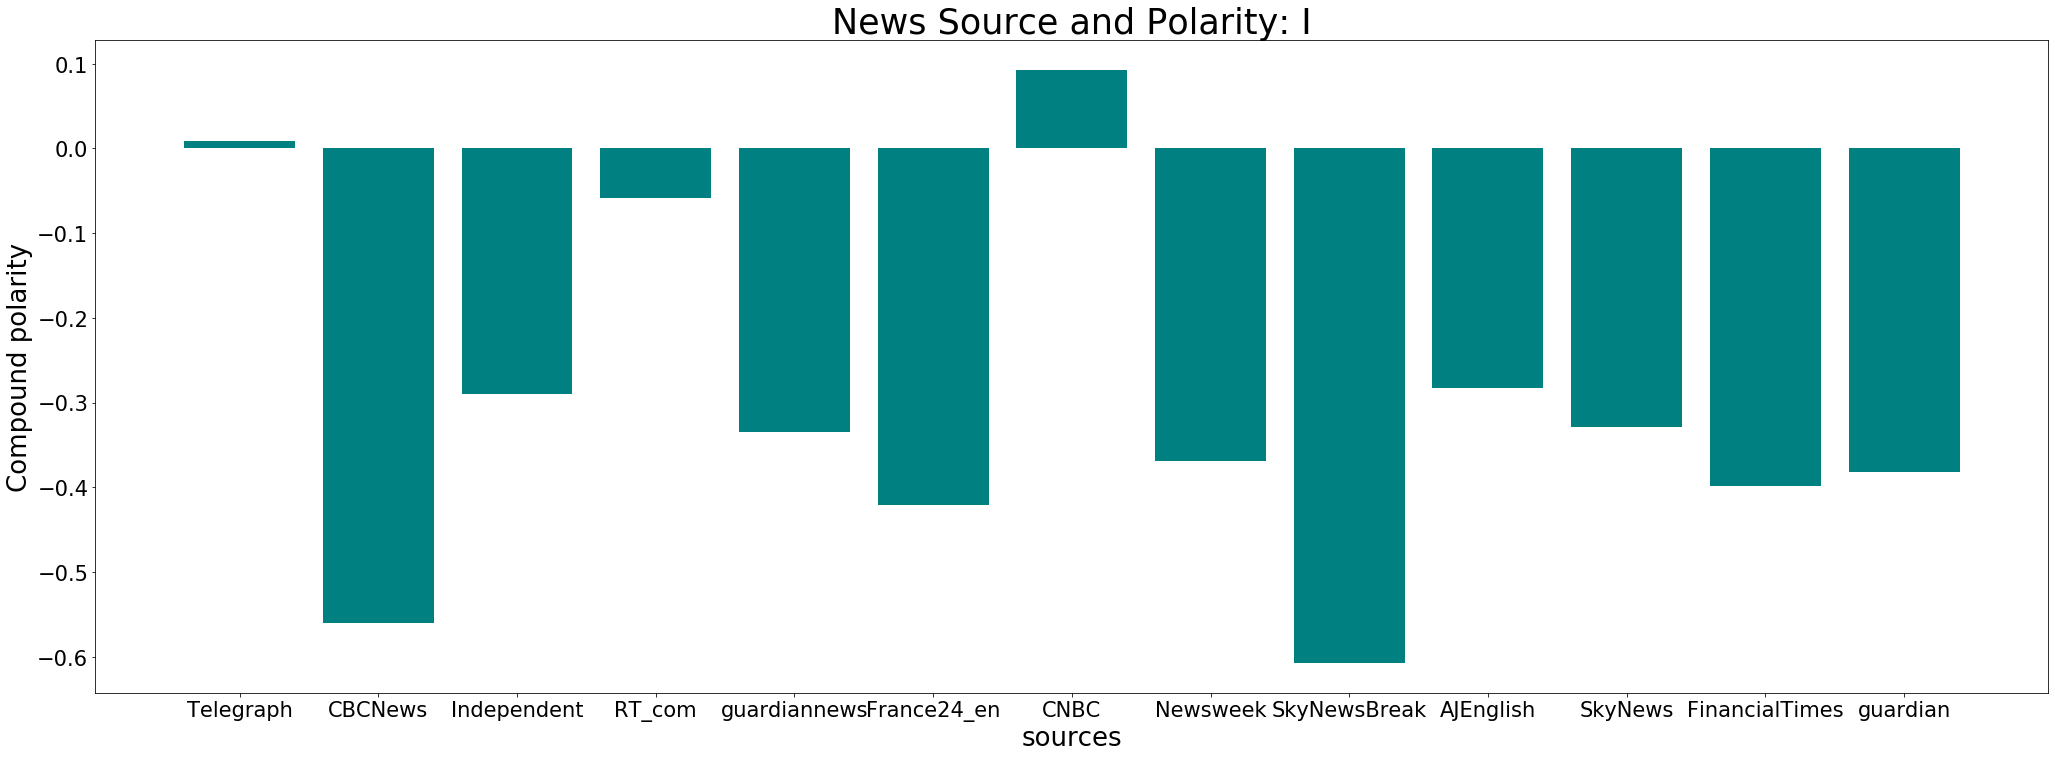

None

In [275]:
# plotting news source by its polarity
plt.figure(figsize=(35, 12))
#fig = plt.figure(figsize=(100,50))
plt.bar(df_sentiment['News Source'][0:13],df_sentiment['Average News Sentiment'][0:13], color = "teal")
plt.xlabel("sources",fontsize = 26)
plt.ylabel("Compound polarity", fontsize = 26)
plt.title("News Source and Polarity: I", fontsize = 35)
plt.tick_params(labelsize=21)
display(plt.show())

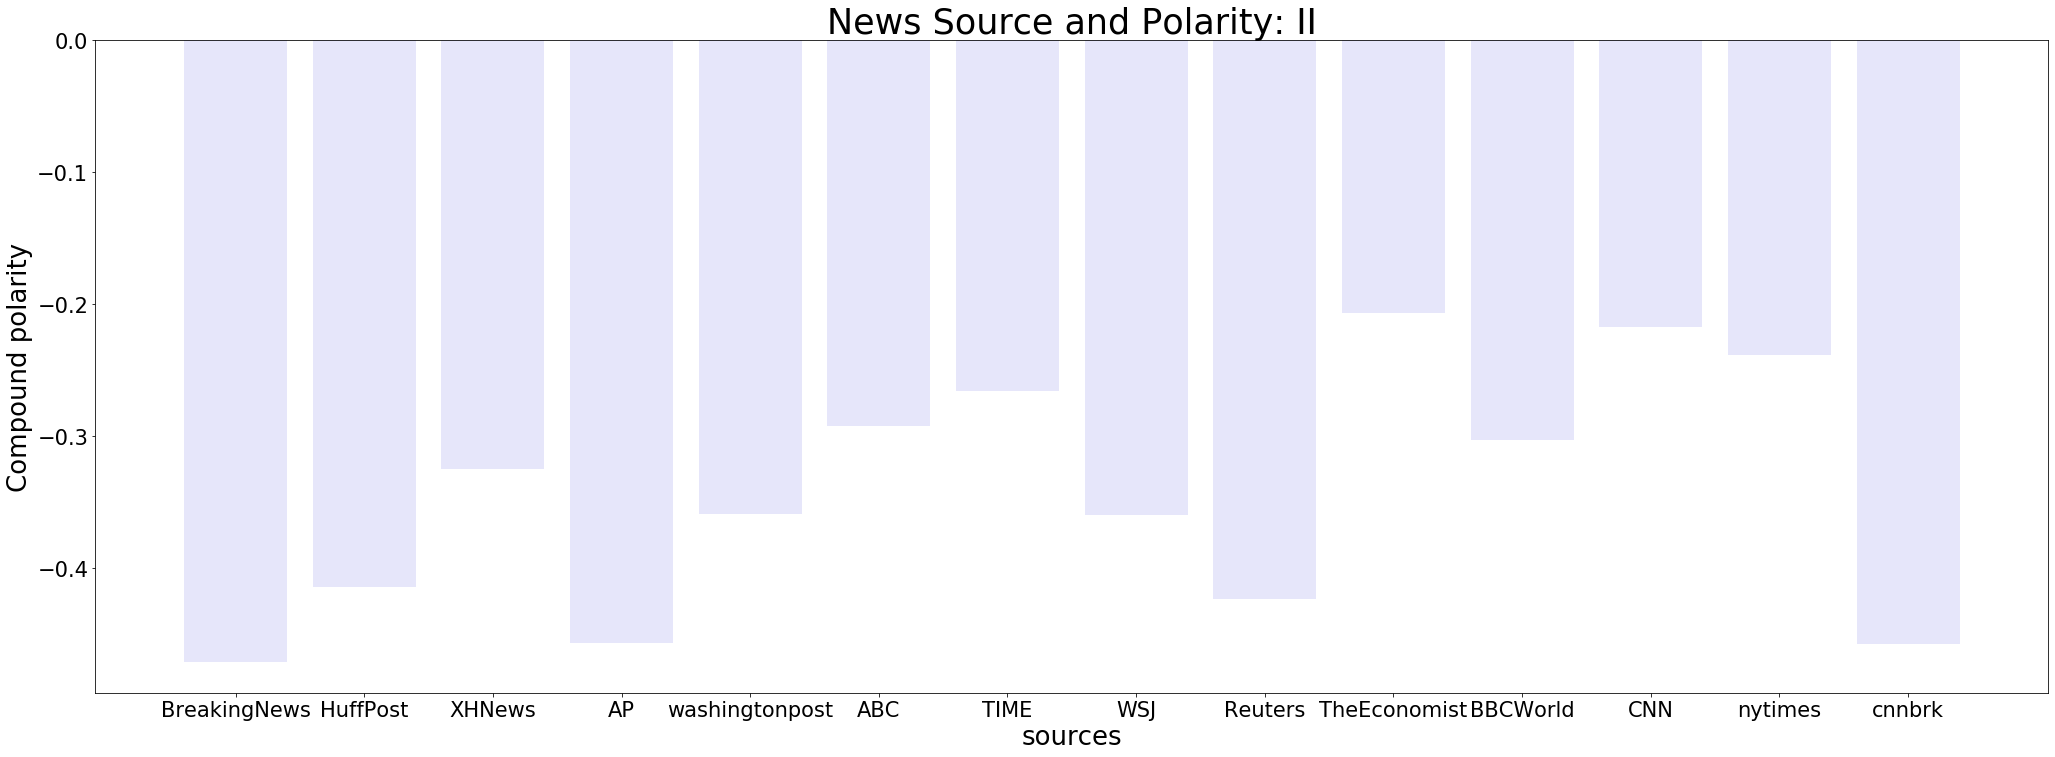

None

In [276]:
# all the sources covered
plt.figure(figsize=(35, 12))
plt.bar(df_sentiment['News Source'][13:],df_sentiment['Average News Sentiment'][13:], color = "lavender")
plt.xlabel("sources",fontsize = 26)
plt.ylabel("Compound polarity", fontsize = 26)
plt.title("News Source and Polarity: II", fontsize = 35)
plt.tick_params(labelsize=21)
display(plt.show())

In [277]:
# Cumulative of all of a feature on a given date 
def allFeatureOnDate(date, feature):
    total_feature = 0;
    for i in range(0,len(df)):
        if(df['Date'][i]== date):
            total_feature = total_feature + df[feature][i]
    return total_feature

In [278]:
# creating a date dataframe containing all the likes and tweets on a given day
all_dates = df['Date'].unique()
df_date = pd.DataFrame(columns = ["Date","Total Likes","Total Retweets"])
for date in all_dates:
    total_likes = allFeatureOnDate(date, 'Likes')
    total_retweets = allFeatureOnDate(date,'Retweet count')
    df_date = df_date.append({"Date": date, "Total Likes":total_likes,"Total Retweets":total_retweets}, ignore_index = True)
display(df_date.head())

,Date,Total Likes,Total Retweets
0,2020-06-30,15195,5239
1,2020-06-29,16085,4906
2,2020-06-28,40234,15047
3,2020-06-23,57270,17273
4,2020-06-22,8502,2645


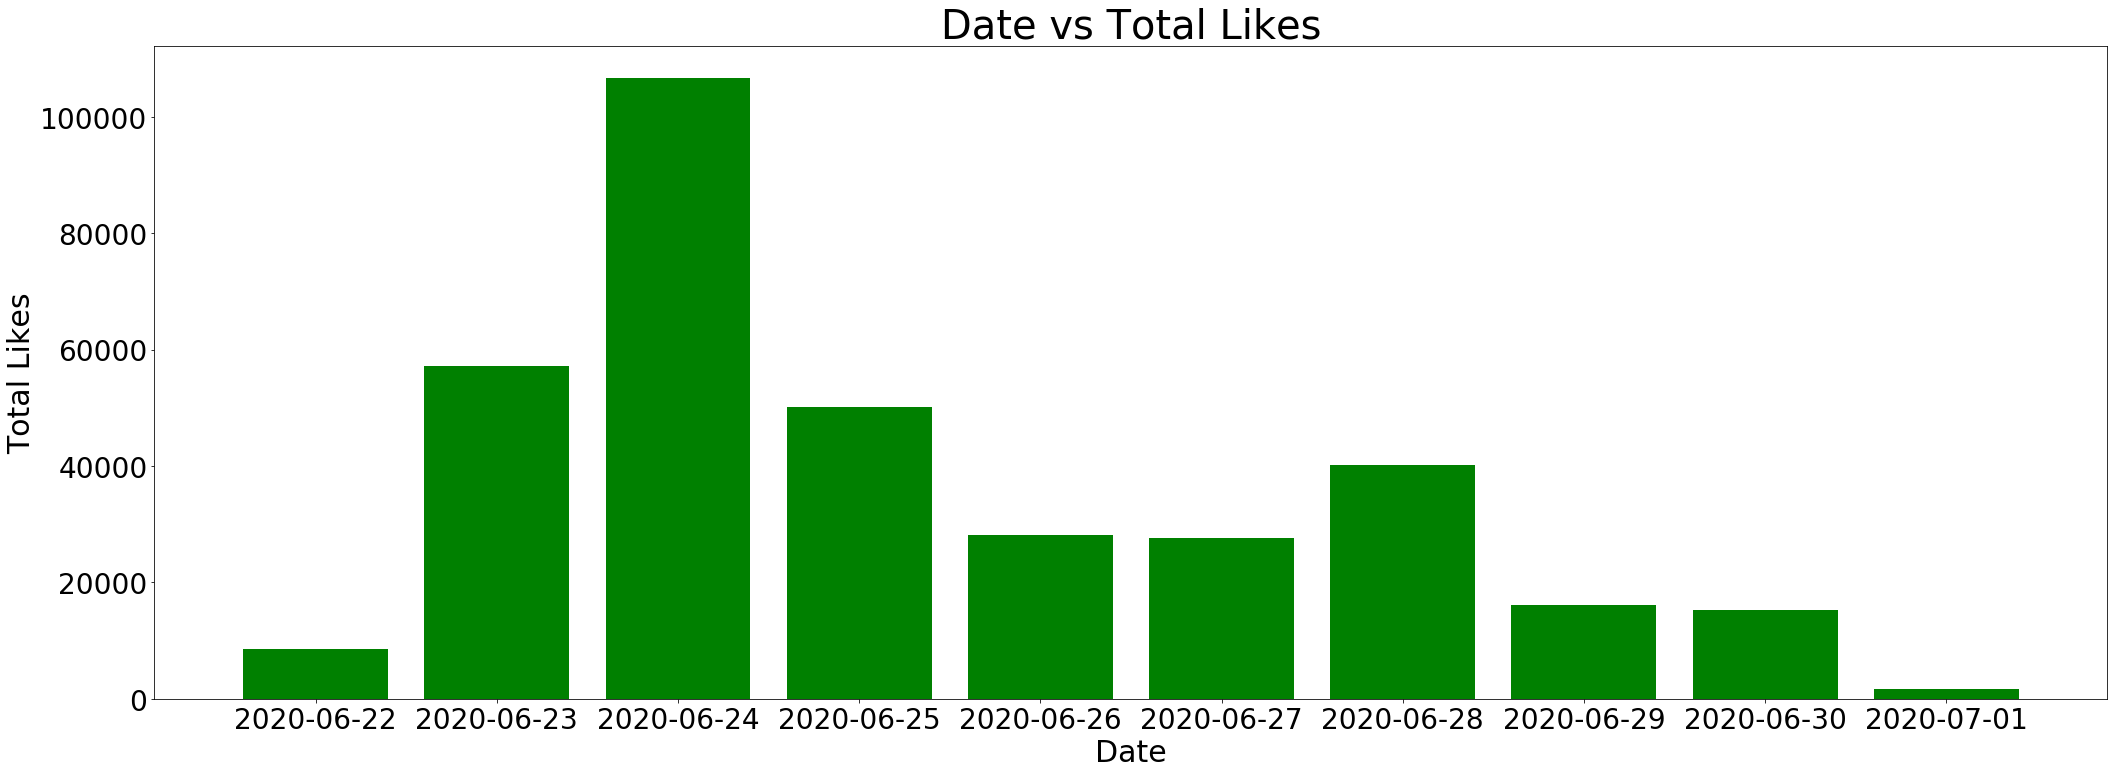

None

In [280]:
# plotting likes vs date
plt.figure(figsize=(35, 12))
plt.bar(df_date['Date'], df_date['Total Likes'], color = "green")
plt.xlabel("Date",fontsize = 30)
plt.ylabel("Total Likes", fontsize = 30)
plt.title("Date vs Total Likes", fontsize = 40)
plt.tick_params(labelsize=28)
display(plt.show())

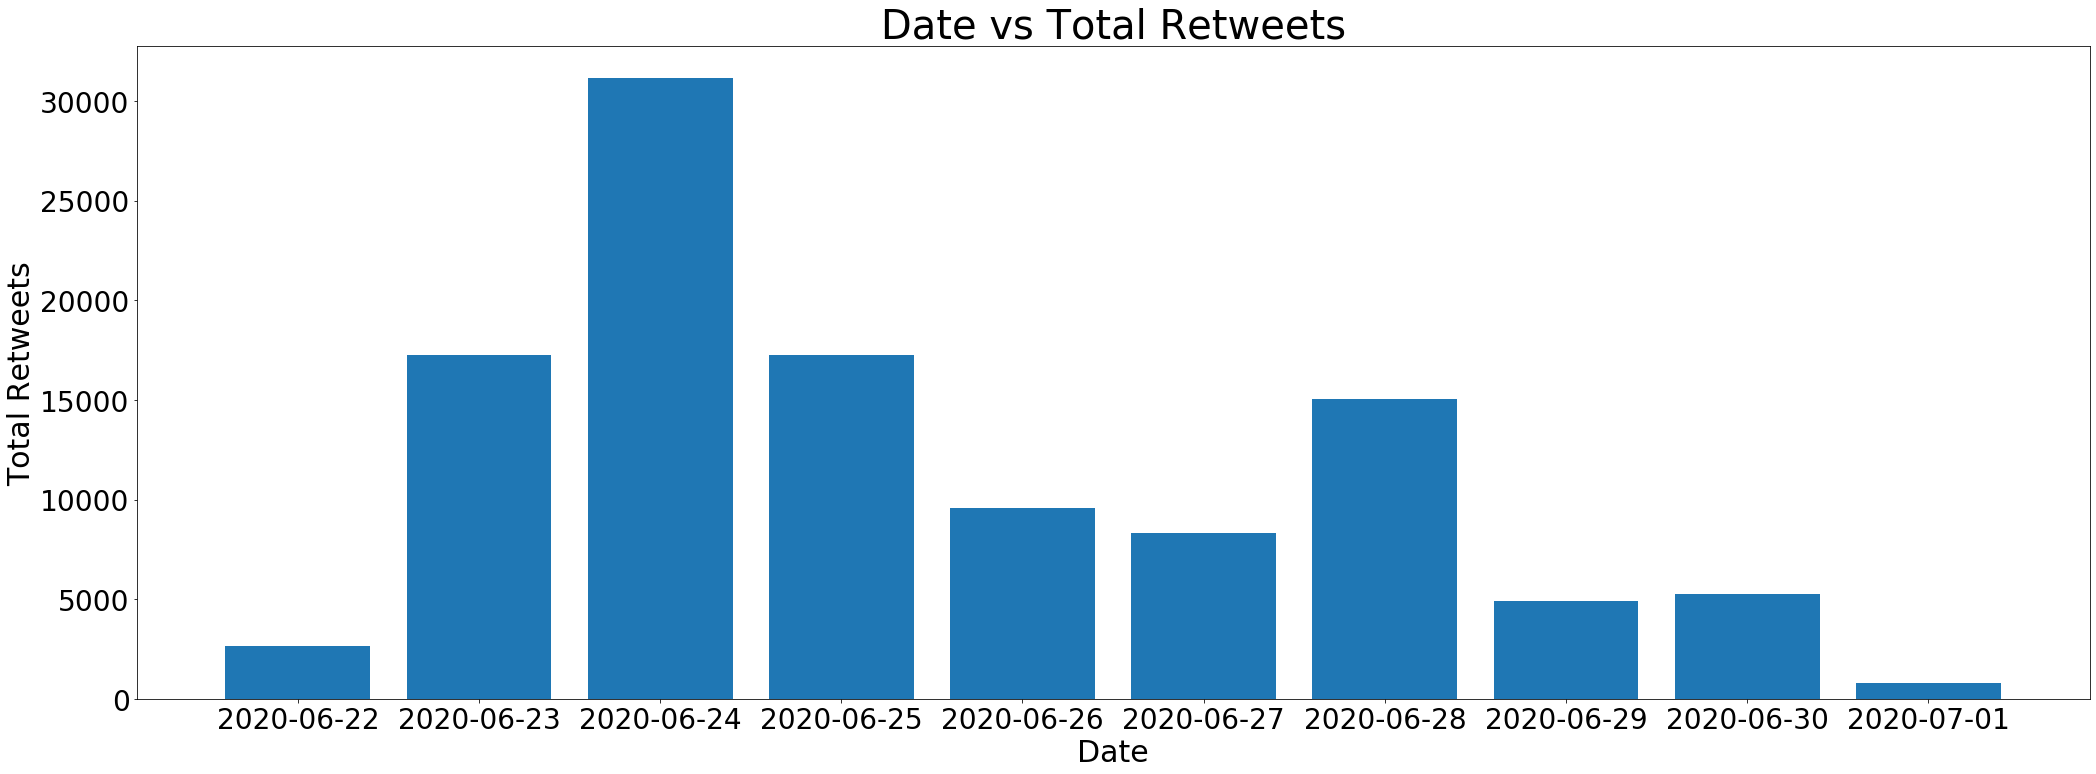

None

In [281]:
# plotting date vs retweets
plt.figure(figsize=(35, 12))
plt.bar(df_date['Date'], df_date['Total Retweets'])
plt.xlabel("Date",fontsize = 30)
plt.ylabel("Total Retweets", fontsize = 30)
plt.title("Date vs Total Retweets", fontsize = 40)
plt.tick_params(labelsize=28)
display(plt.show())